In [1]:
%matplotlib inline

In [ ]:
import pandas as pd
import re

In [91]:
def df_to_markdown(df, index=True, header=True):
    if not header:
        return df.to_csv(sep="|", index=index, header=False)
    else:
        fmt = ['---' for i in range(len(df.columns))]
        df_fmt = pd.DataFrame([fmt], columns=df.columns)
        df_formatted = pd.concat([df_fmt, df])
        return df_formatted.to_csv(sep="|", index=index)

In [130]:
def df_md_summary(df, mean=None, rows=4, index=True, header=True):
    top = df_to_markdown(df.head(rows))[:-1]
    top = 'Rank' + top.replace('0|---', '---|---')
    print(top)
    
    if mean:
        mean = int(round(df[mean].mean()))
        print('...|...|...')
        print(f'...|mean|{mean}')
        print('...|...|...')
    
    bottom = df_to_markdown(df.tail(rows), header=False)
    print(bottom)


In [30]:
link = "https://en.wikipedia.org/wiki/Parental_leave"
col = 'Maternity leave (weeks)'

tables = pd.read_html(link, header=0)

In [31]:
allDf = []

for table in tables:
    if table.columns[0] == 'Country':
        print(len(table))
        allDf.append(table)

africa = allDf[0]
americas = allDf[1]
asiaPacific = allDf[2]
europeCentralAsia = allDf[3]

52
37
41
52


In [32]:
def d(s):
    s == s.lower()
    firstNr = int(re.search(r'\d+', s).group())
    
    if 'day' in s:
        result = round(firstNr / 7)    
    elif 'month' in s:
        result = firstNr * 4.345
    else:
        result = firstNr
    
    return int(round(result))

In [33]:
americas.iloc[9]['Maternity leave (weeks)'] = '17[113]'

In [34]:
asiaPacific[col] = asiaPacific['Paid maternity leave'].apply(lambda s: d(s))

In [35]:
asiaPacific.at[25, col] = 22
asiaPacific.at[26, col] = 14
asiaPacific.at[27, col] = 13
asiaPacific.at[34, col] = 24
asiaPacific.at[36, col] = 8

In [36]:
mainDf = pd.concat(allDf, ignore_index=True, sort=False)
mainDf['Weeks'] = mainDf[col].apply(lambda s: int(re.search(r'\d+', str(s)).group()))

In [37]:
maternity = mainDf[['Country', 'Weeks']].sort_values('Weeks', ascending=False)
maternity.index = maternity.reset_index(drop=True).index + 1

In [38]:
maternity

,Country,Weeks
1,Estonia,62
2,Bulgaria,58
3,Croatia,58
4,Bosnia and Herzegovina,52
5,United Kingdom,52
6,Albania,52
7,Montenegro,52
8,United Arab Emirates,45
9,Ireland,42
10,Macedonia,39


In [39]:
maternity.head(4)

,Country,Weeks
1,Estonia,62
2,Bulgaria,58
3,Croatia,58
4,Bosnia and Herzegovina,52


In [40]:
maternity.tail(4)

,Country,Weeks
179,Syrian Arab Republic,7
180,Tunisia,4
181,United States of America,0
182,Papua New Guinea,0


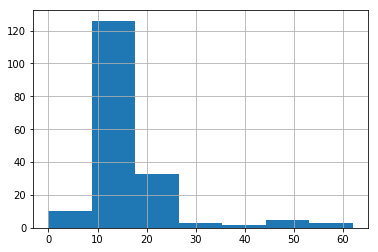

In [41]:
maternity['Weeks'].hist(bins=7)

In [42]:
maternity.describe()

,Weeks
count,182.000000
mean,16.384615
std,9.758712
min,0.000000
25%,12.000000
50%,14.000000
75%,17.750000
max,62.000000


In [122]:
df_md_summary(maternity)

Rank|Country|Weeks
---|---|---
1|Estonia|62
2|Bulgaria|58
3|Croatia|58
4|Bosnia and Herzegovina|52
179|Syrian Arab Republic|7
180|Tunisia|4
181|United States of America|0
182|Papua New Guinea|0



In [58]:
tables = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_atheism', header=0)

In [74]:
col = '"Believe in God, absolutely certain"(poll 2)**'
god = tables[6][['Country', col]].sort_values(col)
god.index = god.reset_index(drop=True).index + 1
god[col] = god[col].apply(lambda s: f'{s}%')

In [75]:
df_to_markdown(god)

|Country|"""Believe in God, absolutely certain""(poll 2)**"
0|---|---
1|Estonia|13%
2|Czech Republic|13%
3|Russia|25%
4|Hungary|26%
5|Belarus|26%
6|Latvia|28%
7|Bulgaria|30%
8|Ukraine|32%
9|Lithuania|34%
10|Poland|45%
11|Moldova|55%
12|Croatia|57%
13|Serbia|58%
14|Greece|59%
15|Romania|64%
16|Bosnia|66%
17|Georgia|73%
18|Armenia|79%



In [135]:
free = pd.read_csv('temp.csv', header=None, names=['Country', 'Freedom'])
free = free.sort_values(['Freedom', 'Country'])
free.index = free.reset_index(drop=True).index + 1

In [136]:
df_md_summary(free, mean='Freedom')

Rank|Country|Freedom
---|---|---
1|Estonia|6
2|Iceland|6
3|Canada|15
4|Germany|19
...|...|...
...|mean|47
...|...|...
62|Ethiopia|83
63|Syria|83
64|Iran|85
65|China|88

